In [1]:
import numpy as np
import pandas as pd
import geopandas as gp
import os
import subprocess
import statsmodels.formula.api as smf

import pysal as ps

import pylab as pl
%pylab inline

# make sure we are at the top of the repo
wd = subprocess.check_output('git rev-parse --show-toplevel', shell = True)
os.chdir(wd[:-1]) #-1 removes \n

Populating the interactive namespace from numpy and matplotlib


In [2]:
# read in cleaned data
df = gp.read_file('data/citi_density/citi_density.shp')
df = df.dropna()

In [3]:
# get rid of outlier
df = df[df['n_rides'] < 50000]

In [4]:
# the model we use
lm = smf.ols('n_rides ~ citi_ct + dist_towor + dist_tohom + subway_dis + workers + residents', data = df).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                n_rides   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     17.44
Date:                Mon, 12 Dec 2016   Prob (F-statistic):           1.09e-16
Time:                        04:29:05   Log-Likelihood:                -2372.3
No. Observations:                 243   AIC:                             4759.
Df Residuals:                     236   BIC:                             4783.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   2579.0500   2533.110      1.018      0.310     -2411.345  7569.445
citi_ct       42.5845      8.697      4.896      0.000        25.450    59.719
dist_towor -4541.9546    863.698     -5.259      0.000     -6243.498 -2840.411
dist_tohom  2274.1203    485.036      4.689      0.000      1318.568  3229.673
subway_dis -5846.1513   2345.469     -2.493      0.013     -1.05e+04 -1225.421
workers        3.1621      1.067      2.963      0.003         1.059     5.265
residents      5.1707      2.507      2.063      0.040         0.233    10.109
==============================================================================
Omnibus:                       83.628   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              328.011
Skew:                           1.375   Prob(JB):                     5.93e-72
Kurtosis:                       7.983   Cond. No.                     5.03e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [5]:
# read in 2015+ data
df_new = gp.read_file('data/citi_stations_new/citi_stations_new.shp')
df_new = df_new.dropna()

df_new = df_new[df_new['n_rides'] < 50000]

In [6]:
# prediction for new stations based on old model

df_new['pred_rides'] = lm.predict(df_new)

df_new['resid'] = df_new['n_rides'] - df_new['pred_rides']

In [7]:
# look at how we did...

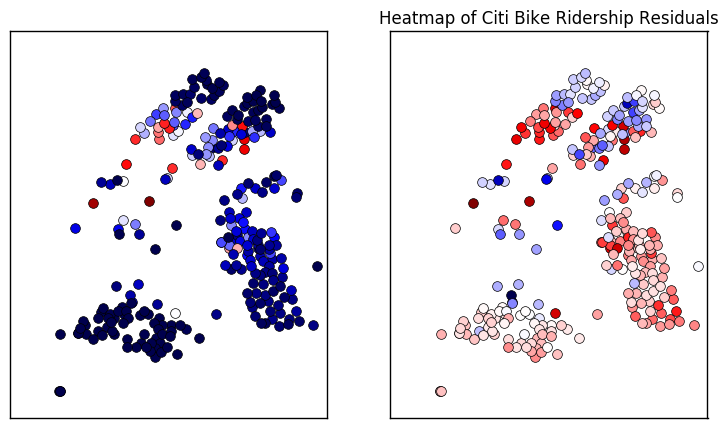

In [8]:
f1, ax = plt.subplots(ncols = 2, figsize=(9,5))
ax[0].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)
ax[1].get_xaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)
df_new.plot(column = 'n_rides', cmap = 'seismic', ax = ax[0], markersize = 7)

#df.plot(column = 'dist_tohom', cmap = 'seismic', ax = ax[1], markersize = 7)
df_new.plot(column = 'resid', cmap = 'seismic', ax = ax[1], markersize = 7)
plt.title("Heatmap of Citi Bike Ridership Residuals")

In [9]:
#calculating R-squared for new stations
df_new['resid_2'] = df_new['resid']**2
df_new['n_rides_mean'] = df_new['n_rides'].mean()
df_new['sum_squares'] = (df_new['n_rides'] - df_new['n_rides_mean'])**2
df_new.head()

,bike,citi_ct,commute_ti,dist_tohom,dist_towor,geometry,income_pc,n_rides,no_vehic_1,no_vehicle,...,residents,station_id,subway_ct,subway_dis,workers,pred_rides,resid,resid_2,n_rides_mean,sum_squares
0,7.75,84,512.5,2.741940,2.062547,POINT (995903.4755103544 196890.1444962268),10482.25,1639,406.75,14.0,...,109.711310,3075,10,0.088465,85.982143,3345.642207,-1706.642207,2.912628e+06,6368.323636,2.236650e+07
1,0.00,102,413.5,5.726791,2.390089,POINT (993984.1793322223 218842.3118619589),140649.00,1941,128.00,252.0,...,118.800000,3133,10,0.075666,198.650000,9890.484739,-7949.484739,6.319431e+07,6368.323636,1.960119e+07
2,11.50,68,273.0,5.019588,2.755904,POINT (997319.5902269882 207260.8096926071),27253.00,7029,192.00,0.0,...,111.555556,3118,0,0.301732,51.500000,3348.453905,3680.546095,1.354642e+07,6368.323636,4.364933e+05
3,12.00,76,610.0,4.849062,2.566536,POINT (997279.3509328024 204177.0295605607),39318.00,10684,351.00,0.0,...,116.500000,3110,6,0.191563,101.500000,4989.163419,5694.836581,3.243116e+07,6368.323636,1.862506e+07
4,0.00,74,326.5,4.684627,2.710511,POINT (995751.5386958895 200666.2396872085),42034.50,24263,225.00,0.0,...,116.375000,3093,4,0.086568,116.125000,4535.542398,19727.457602,3.891726e+08,6368.323636,3.202194e+08


In [10]:
R_squared = 1 - (df_new.resid_2.sum() / df_new.sum_squares.sum())
R_squared

0.025828380647984983

In [11]:
# export final data
df_export = df_new[["geometry", "resid", "n_rides", "pred_rides"]]

if not os.path.exists('data/citi_stations_new/'):
    os.makedirs('data/citi_stations_new/')
    
df_export.to_file('data/citi_stations_new/citi_stations_new_applied_to_old_model.shp')